<a href="https://colab.research.google.com/github/mikirowbottom/2021_ENCM369-pic4/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 0, 'Time (s)')

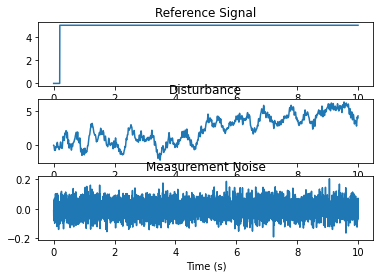

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy as sp

P = ct.tf([1, 3], [1, 8, 27, 50, 50])

N = 5000
duration = 10
t = np.linspace(0,duration,N)
n = 0.05*np.random.randn(N)

b1, a1 = sp.signal.butter(5, 0.1, 'low')
b2, a2 = sp.signal.butter(5, 0.01, 'low')
d = 10*sp.signal.lfilter(b2, a2, np.random.randn(N))
d += sp.signal.lfilter(b1, a1, np.random.randn(N))
d += np.linspace(0,5,N)

r = 5*np.ones(N)
r[0:100] = np.zeros(100)

fig, ax = plt.subplots(3,1)
ax[0].plot(t,r)
ax[0].set_title('Reference Signal')
ax[0].set_xlabel('Time (s)')
ax[1].plot(t,d)
ax[1].set_title('Disturbance')
ax[1].set_xlabel('Time (s)')
ax[2].plot(t,n)
ax[2].set_title('Measurement Noise')
ax[2].set_xlabel('Time (s)')

Question 1

Text(0.5, 0, 'Time (s)')

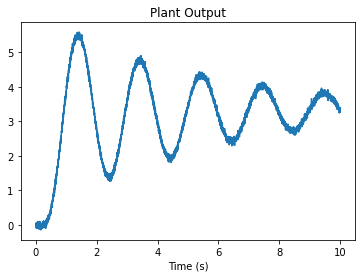

In [ ]:
Kp = 30
K = ct.tf(Kp,1)
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')

Question 2

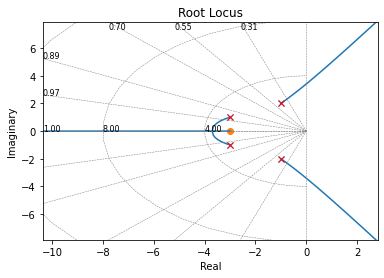

In [ ]:
fig,ax = plt.subplots(1)
cl_poles, K_vec = ct.root_locus(P)
den_closed_loop = np.array([1, 8, 27, 50, 50]) # enter the denominator of your
# closed-loop system from Q1 here
cl_poles_selected = np.roots(den_closed_loop)
ax.plot(np.real(cl_poles_selected), np.imag(cl_poles_selected), 'rx')

Question 3

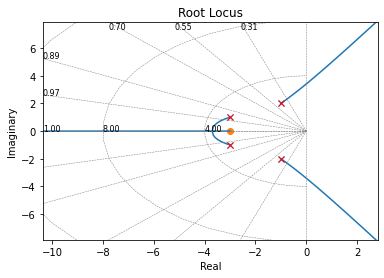

In [ ]:
Kp_new = Kp/2
K = ct.tf(Kp_new,1)
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig,ax = plt.subplots(1)
cl_poles, K_vec = ct.root_locus(P)
den_closed_loop = np.array([1, 8, 27, 50, 50]) # enter the denominator of your
# closed-loop system from Q1 here
cl_poles_selected = np.roots(den_closed_loop)
ax.plot(np.real(cl_poles_selected), np.imag(cl_poles_selected), 'rx')

Question 4

Text(0.5, 0, 'Time (s)')

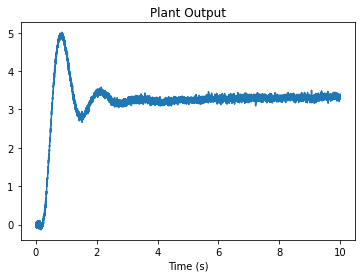

In [ ]:
Kd = 20 # enter your value for Kd here
K = ct.tf(Kp,1) + ct.tf([Kd, 0], [0.01, 1])
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')

Question 5


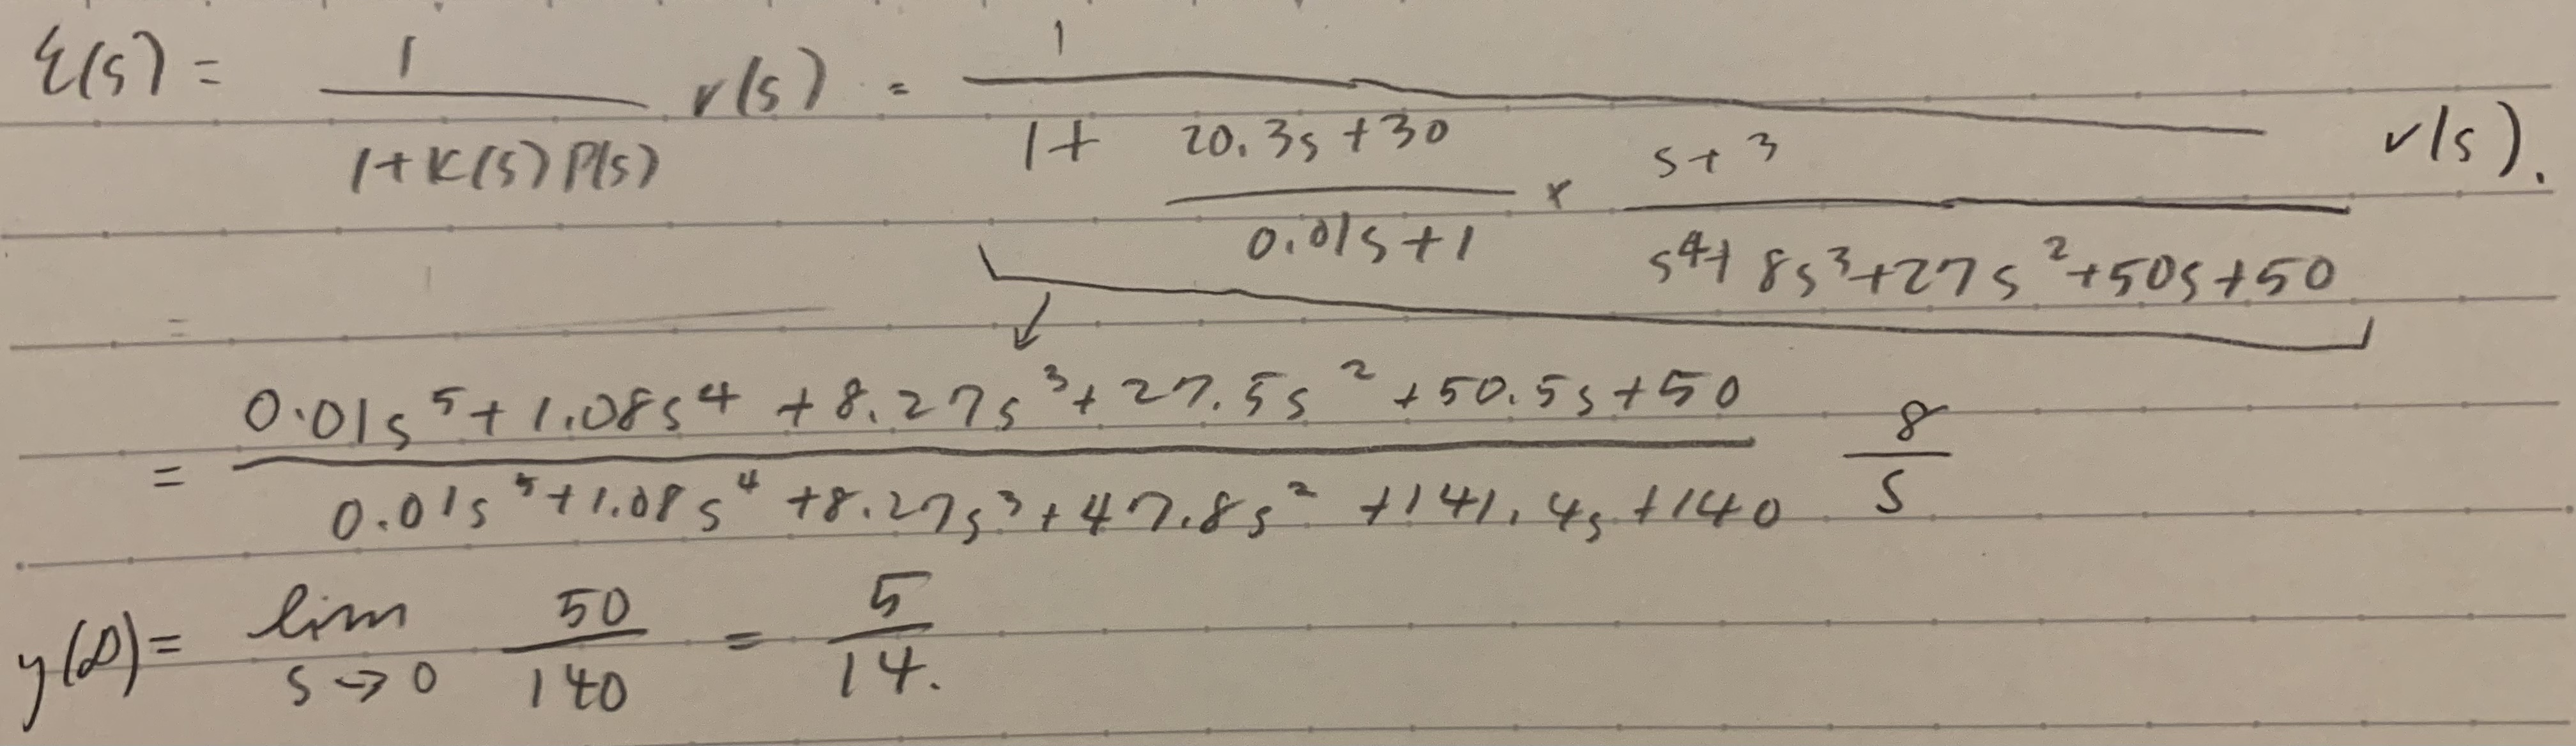

Question 6

Text(0.5, 0, 'Time (s)')

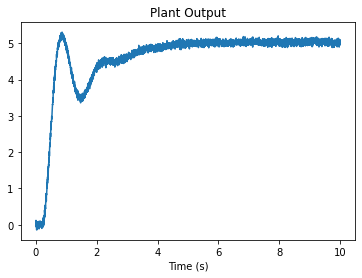

In [ ]:
Ki = 25 # enter your value here
K = ct.tf(Kp,1) + ct.tf([Kd, 0], [0.01, 1]) + ct.tf([Ki], [1, 0])
T = K*P/(1+K*P)
S = 1/(1+K*P)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Plant Output')
ax.set_xlabel('Time (s)')

Question 7

Question 8

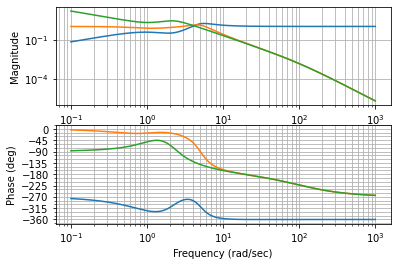

In [ ]:
S = 1/(1+K*P)
T = K*P/(1+K*P)
L = K*P
mag, phase, w = ct.bode_plot([S,T,L])

Question 9

Text(0.5, 0, 'Time (s)')

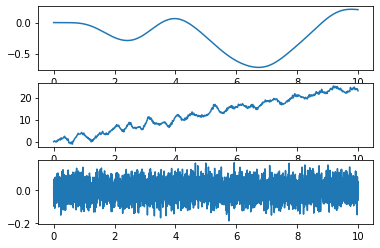

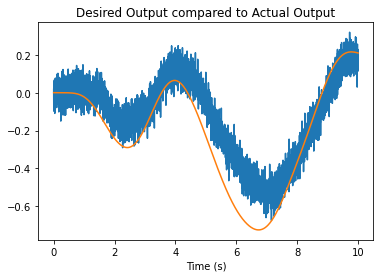

In [ ]:
n = 0.05*np.random.randn(N)
d = 10*sp.signal.lfilter(b2, a2, np.random.randn(N))
d += sp.signal.lfilter(b1, a1, np.random.randn(N))
d += 5*np.linspace(0,5,N)
b3, a3 = sp.signal.butter(5, 0.001, 'low')
r = 10*sp.signal.lfilter(b3, a3, np.random.randn(N))
fig, ax = plt.subplots(3,1)
ax[0].plot(t,r)
ax[1].plot(t,d)
ax[2].plot(t,n)
t,y_r = ct.forced_response(T,t,r)
t,y_n = ct.forced_response(S,t,n)
t,y_d = ct.forced_response(S*P,t,d)
y = y_r + y_n + y_d
fig, ax = plt.subplots(1)
ax.plot(t,y, label='actual output')
ax.plot(t,r, label='desired output')
ax.set_title('Desired Output compared to Actual Output')
ax.set_xlabel('Time (s)')